# 0. Install dan Import

In [ ]:
python --v

In [ ]:
!pip install mediapipe opencv-python pandas scikit-learn

In [ ]:
!pip install opencv-python

In [ ]:
!pip install pandas

In [ ]:
!pip install scikit-learn 

In [ ]:
!pip install -U scikit-learn

In [ ]:
!python -m pip show scikit-learn

In [ ]:
import sys
!{sys.executable} -m pip install sklearn

In [ ]:
!python -m pip freeze

In [1]:
import mediapipe as mp 
import cv2 

In [2]:
mp_drawing = mp.solutions.drawing_utils 
mp_holistic = mp.solutions.holistic

# 1. Make some detections

In [4]:
cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR - RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False       
        
        # hasil
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # RGB - BGR
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(128,165,0), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(255,255,0), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
            
        # Flip the image horizontally for a selfie-view display.
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [4]:
results.pose_landmarks.landmark[0].visibility

0.9999915361404419

# 2. Capture Landmarks & Export to CSV

In [3]:
import csv
import os
import numpy as np

In [6]:
num_coords = len(results.pose_landmarks.landmark)+len(results.face_landmarks.landmark)
num_coords

501

In [7]:
landmarks = ['class']
for val in range(1, num_coords+1):
    landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val), 'v{}'.format(val)] #Menampung Koordinat saat realtime

In [8]:
landmarks

['class',
 'x1',
 'y1',
 'z1',
 'v1',
 'x2',
 'y2',
 'z2',
 'v2',
 'x3',
 'y3',
 'z3',
 'v3',
 'x4',
 'y4',
 'z4',
 'v4',
 'x5',
 'y5',
 'z5',
 'v5',
 'x6',
 'y6',
 'z6',
 'v6',
 'x7',
 'y7',
 'z7',
 'v7',
 'x8',
 'y8',
 'z8',
 'v8',
 'x9',
 'y9',
 'z9',
 'v9',
 'x10',
 'y10',
 'z10',
 'v10',
 'x11',
 'y11',
 'z11',
 'v11',
 'x12',
 'y12',
 'z12',
 'v12',
 'x13',
 'y13',
 'z13',
 'v13',
 'x14',
 'y14',
 'z14',
 'v14',
 'x15',
 'y15',
 'z15',
 'v15',
 'x16',
 'y16',
 'z16',
 'v16',
 'x17',
 'y17',
 'z17',
 'v17',
 'x18',
 'y18',
 'z18',
 'v18',
 'x19',
 'y19',
 'z19',
 'v19',
 'x20',
 'y20',
 'z20',
 'v20',
 'x21',
 'y21',
 'z21',
 'v21',
 'x22',
 'y22',
 'z22',
 'v22',
 'x23',
 'y23',
 'z23',
 'v23',
 'x24',
 'y24',
 'z24',
 'v24',
 'x25',
 'y25',
 'z25',
 'v25',
 'x26',
 'y26',
 'z26',
 'v26',
 'x27',
 'y27',
 'z27',
 'v27',
 'x28',
 'y28',
 'z28',
 'v28',
 'x29',
 'y29',
 'z29',
 'v29',
 'x30',
 'y30',
 'z30',
 'v30',
 'x31',
 'y31',
 'z31',
 'v31',
 'x32',
 'y32',
 'z32',
 'v32',
 '

In [ ]:
#with open('datasetbismillah2.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [ ]:
class_name = "G"

In [ ]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR - RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # holistic proses
        results = holistic.process(image)
        
        # RGB - BGR utk rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(128,165,0), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(255,255,0), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
       
        # Export koordinat
        try:
            # Ambil Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Ambil Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # Satukan baris
            row = pose_row+face_row
            
            # Tambah class name 
            row.insert(0, class_name)
           
    
            # Export ke CSV
            with open('datasetbismillah2.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row) 
            
        except:
            pass
                        
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

# 3 Train Custom Model Skicit Learn 

## 3.1 Read in Collected Data and Process

In [4]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('datasetbismillah2.csv')

In [6]:
dept_emp_num = df.groupby('class')['class'].count()
print (dept_emp_num)
df.shape

class
A    2382
B    2301
C    2345
D    2720
E    2464
F    2586
G    2513
H    3104
I    2976
J    2309
Name: class, dtype: int64


(25700, 2005)

In [22]:
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
0,A,0.517018,0.450319,-0.907985,0.999966,0.535815,0.412905,-0.857853,0.999946,0.544008,...,-0.000019,0.0,0.554457,0.404077,0.010973,0.0,0.557556,0.401135,0.011333,0.0
1,A,0.518044,0.449603,-0.721595,0.999969,0.536094,0.412422,-0.672199,0.999949,0.544797,...,-0.000590,0.0,0.554648,0.404748,0.009466,0.0,0.557735,0.401707,0.009729,0.0
2,A,0.519107,0.448986,-0.668808,0.999971,0.536359,0.411913,-0.621694,0.999950,0.545401,...,-0.001195,0.0,0.555168,0.406111,0.009198,0.0,0.558162,0.403067,0.009478,0.0
3,A,0.519342,0.448825,-0.657694,0.999972,0.536388,0.411779,-0.612594,0.999951,0.545620,...,-0.000534,0.0,0.554637,0.406994,0.009691,0.0,0.557721,0.403890,0.009963,0.0
4,A,0.519427,0.448824,-0.698363,0.999973,0.536387,0.411733,-0.652436,0.999951,0.545713,...,0.000363,0.0,0.553480,0.406471,0.010701,0.0,0.556611,0.403223,0.011037,0.0


In [23]:
df.tail()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
17306,G,0.503180,0.445127,-0.542492,0.999959,0.520043,0.402060,-0.504687,0.999903,0.531285,...,-0.002811,0.0,0.540640,0.398491,0.010168,0.0,0.544185,0.393421,0.010533,0.0
17307,G,0.499820,0.454085,-0.563386,0.999948,0.517854,0.405892,-0.531353,0.999880,0.529804,...,-0.004417,0.0,0.539454,0.406449,0.009427,0.0,0.542978,0.400847,0.009889,0.0
17308,G,0.494106,0.472527,-0.838158,0.999936,0.514402,0.417887,-0.819852,0.999850,0.527750,...,-0.006101,0.0,0.540628,0.421516,0.008636,0.0,0.544458,0.415038,0.009156,0.0
17309,G,0.490394,0.493745,-0.984810,0.999914,0.512950,0.433829,-0.968435,0.999798,0.526816,...,-0.006509,0.0,0.541318,0.435734,0.008993,0.0,0.545277,0.428847,0.009505,0.0
17310,G,0.487160,0.518233,-1.092946,0.999892,0.511850,0.452807,-1.084361,0.999743,0.526119,...,-0.006895,0.0,0.541886,0.445927,0.010424,0.0,0.545690,0.439257,0.010995,0.0


In [24]:
df[df['class']=='G']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z499,v499,x500,y500,z500,v500,x501,y501,z501,v501
14798,G,0.516095,0.425535,-0.489243,0.999789,0.533655,0.393997,-0.447930,0.999487,0.543570,...,-0.001177,0.0,0.552614,0.391014,0.009430,0.0,0.555809,0.387813,0.009701,0.0
14799,G,0.515690,0.428735,-0.631313,0.999805,0.533315,0.395281,-0.587278,0.999524,0.542969,...,-0.000889,0.0,0.555618,0.388261,0.010184,0.0,0.558838,0.384844,0.010534,0.0
14800,G,0.515689,0.429665,-0.673350,0.999821,0.533275,0.395339,-0.628715,0.999563,0.542779,...,-0.001136,0.0,0.555145,0.387362,0.009734,0.0,0.558352,0.383833,0.010047,0.0
14801,G,0.515823,0.429782,-0.679533,0.999836,0.533275,0.395152,-0.636105,0.999600,0.542713,...,-0.001992,0.0,0.554780,0.387070,0.008522,0.0,0.557870,0.383612,0.008813,0.0
14802,G,0.516437,0.430231,-0.689875,0.999850,0.533311,0.395190,-0.644079,0.999632,0.542707,...,-0.001113,0.0,0.554662,0.387425,0.009545,0.0,0.557855,0.383927,0.009832,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17306,G,0.503180,0.445127,-0.542492,0.999959,0.520043,0.402060,-0.504687,0.999903,0.531285,...,-0.002811,0.0,0.540640,0.398491,0.010168,0.0,0.544185,0.393421,0.010533,0.0
17307,G,0.499820,0.454085,-0.563386,0.999948,0.517854,0.405892,-0.531353,0.999880,0.529804,...,-0.004417,0.0,0.539454,0.406449,0.009427,0.0,0.542978,0.400847,0.009889,0.0
17308,G,0.494106,0.472527,-0.838158,0.999936,0.514402,0.417887,-0.819852,0.999850,0.527750,...,-0.006101,0.0,0.540628,0.421516,0.008636,0.0,0.544458,0.415038,0.009156,0.0
17309,G,0.490394,0.493745,-0.984810,0.999914,0.512950,0.433829,-0.968435,0.999798,0.526816,...,-0.006509,0.0,0.541318,0.435734,0.008993,0.0,0.545277,0.428847,0.009505,0.0


In [15]:
X = df.drop('class', axis=1) # features akan menjadi semua nilai koordinat
y = df['class'] # target = label kelas

# Pembagian Training Data 50:50 , 50% train 50% test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, test_size=0.5, random_state=1234) #train = 50% test = 50%

In [17]:
print ("X_train: ", X_train)
print ("y_train: ", y_train)
print("X_test: ", X_test)
print ("y_test: ", y_test)

X_train:               x1        y1        z1        v1        x2        y2        z2  \
4502   0.516180  0.431664 -0.604703  0.999994  0.531918  0.391594 -0.568741   
25164  0.502079  0.425973 -0.762646  0.999922  0.522841  0.376683 -0.703094   
4764   0.523467  0.423509 -0.570345  0.999979  0.544206  0.386021 -0.528156   
2793   0.522532  0.428302 -0.674534  0.999998  0.538309  0.389291 -0.636178   
13068  0.496482  0.434980 -0.721309  0.999998  0.510418  0.392603 -0.687710   
...         ...       ...       ...       ...       ...       ...       ...   
17048  0.518493  0.437063 -0.528262  0.999972  0.536245  0.398859 -0.486553   
23924  0.504653  0.427312 -0.759636  0.999888  0.522067  0.377291 -0.699006   
23605  0.488000  0.426109 -0.677715  0.999912  0.508993  0.379331 -0.625504   
1318   0.519463  0.457582 -0.547694  0.999993  0.539584  0.419258 -0.508322   
25299  0.487820  0.434982 -0.800890  0.999910  0.513134  0.388230 -0.742999   

             v2        x3        y3  ... 

## 3.2 Train Machine Learning Classification Model

In [18]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.ensemble import RandomForestClassifier

In [19]:
pipelines = {

    'rf':make_pipeline(StandardScaler(), RandomForestClassifier(), ),
}

In [20]:
%%time
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

Wall time: 22.2 s


In [31]:
fit_models

{'rf': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier', RandomForestClassifier())])}

In [21]:
fit_models['rf'].predict(X_test)

array(['E', 'B', 'B', ..., 'D', 'J', 'A'], dtype=object)

In [22]:
y_train

4502     B
25164    J
4764     C
2793     B
13068    F
        ..
17048    G
23924    J
23605    J
1318     A
25299    J
Name: class, Length: 12850, dtype: object

## 3.3 Evaluate and Serialize Model 

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Accuracy metrics 
import pickle

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay #Melihat Visualisasi Confusion Matrix

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
import matplotlib.pyplot as subplot

In [26]:
for algo, model in fit_models.items():
    y_prediksi = model.predict(X_test) #sebagai y prediksi
    print(algo, classification_report(y_test, y_prediksi))

rf               precision    recall  f1-score   support

           A       1.00      1.00      1.00      1169
           B       1.00      1.00      1.00      1136
           C       1.00      1.00      1.00      1186
           D       1.00      1.00      1.00      1366
           E       1.00      1.00      1.00      1257
           F       0.99      1.00      1.00      1317
           G       1.00      1.00      1.00      1231
           H       1.00      1.00      1.00      1511
           I       1.00      1.00      1.00      1530
           J       1.00      1.00      1.00      1147

    accuracy                           1.00     12850
   macro avg       1.00      1.00      1.00     12850
weighted avg       1.00      1.00      1.00     12850



In [27]:
confusion_matrix(y_test, y_prediksi)

array([[1168,    0,    0,    0,    0,    1,    0,    0,    0,    0],
       [   0, 1133,    0,    0,    0,    3,    0,    0,    0,    0],
       [   0,    0, 1186,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1364,    0,    2,    0,    0,    0,    0],
       [   0,    0,    0,    0, 1257,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 1317,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    4, 1227,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 1511,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1530,    0],
       [   0,    0,    1,    0,    0,    0,    0,    0,    0, 1146]],
      dtype=int64)

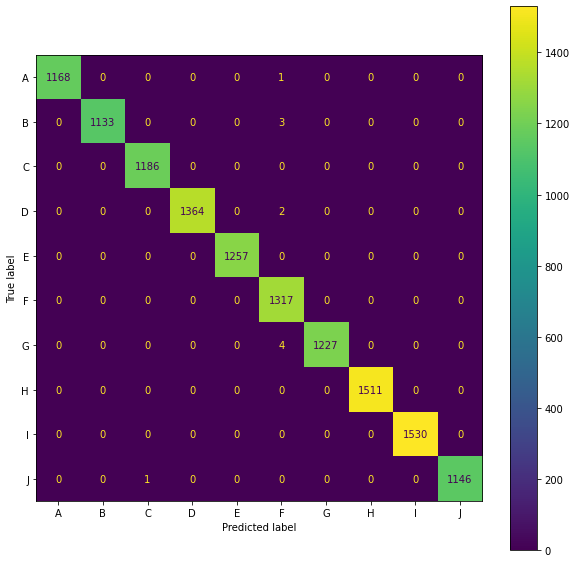

In [29]:
y_prediksi = model.predict(X_test)

cm = confusion_matrix(y_test, y_prediksi)

target_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G','H', 'I', 'J']

cm_display = ConfusionMatrixDisplay(cm, display_labels=target_names)

fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax)

In [26]:
fit_models['rf'].predict(X_test)

array(['D', 'F', 'F', ..., 'F', 'D', 'D'], dtype=object)

In [27]:
y_train

14208    F
15434    G
16212    G
14896    G
3721     B
        ..
8222     D
9449     D
8471     D
17048    G
1318     A
Name: class, Length: 8655, dtype: object

In [28]:
with open('modelbismillah4.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)

# 4. Make Detections with Model

In [37]:
with open('modelbismillah4.pkl', 'rb') as f:
    model = pickle.load(f)

In [38]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [39]:
import time

In [111]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    start = time.time()
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        # print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                                 mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                 )
        
        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                 )

        # 3. Left Hand                                  
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(128,165,0), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(255,255,0), thickness=2, circle_radius=2)
                                 )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        # Export koordinat
        try:
            # Mengambil Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            
            # Mengambil Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # Menyatukan baris
            row = pose_row+face_row
            
            
            X = pd.DataFrame([row])
            body_language_class = model.predict(X)[0]
            body_language_prob = model.predict_proba(X)[0]
            print(body_language_class, body_language_prob)
            
            
            # Ambil koordinat telinga
            coords = tuple(np.multiply(
                            np.array(
                                (results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x, 
                                 results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y))
                        , [640,480]).astype(int))
            
            cv2.rectangle(image, 
                          (coords[0], coords[1]+5), 
                          (coords[0]+len(body_language_class)*20, coords[1]-30), 
                          (245, 117, 16), -1)
            cv2.putText(image, body_language_class, coords, 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # status box
            cv2.rectangle(image, (0,0), (250, 60), (245, 117, 16), -1)
            
            # Display Class
            cv2.putText(image, 'CLASS'
                        , (95,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class.split(' ')[0]
                        , (90,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display prob
            cv2.putText(image, 'PROB'
                        , (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)],2))
                        , (10,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        except:
            pass
                        
        cv2.imshow('Raw Webcam Feed', image)
        end = time.time()
        print(end-start)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


G [0.01 0.17 0.06 0.14 0.16 0.08 0.38]
0.8373973369598389


C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


G [0.01 0.15 0.1  0.11 0.17 0.06 0.4 ]
1.168510913848877


C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


G [0.   0.12 0.12 0.14 0.17 0.04 0.41]
1.3889219760894775
G [0.   0.12 0.13 0.14 0.16 0.06 0.39]
1.578582763671875


C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


G [0.   0.14 0.11 0.1  0.18 0.1  0.37]
1.7692933082580566
G [0.   0.15 0.11 0.11 0.18 0.12 0.33]
1.9537997245788574


C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


G [0.02 0.16 0.1  0.12 0.18 0.13 0.29]
2.1675260066986084
G [0.02 0.18 0.08 0.12 0.19 0.14 0.27]
2.355457067489624
G [0.02 0.16 0.09 0.12 0.19 0.13 0.29]
2.534144163131714


C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


G [0.02 0.18 0.09 0.12 0.19 0.14 0.26]
2.719977855682373


C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


G [0.01 0.14 0.09 0.12 0.2  0.12 0.32]
2.945563554763794


C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


G [0.01 0.13 0.1  0.12 0.19 0.09 0.36]
3.1495606899261475


C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


G [0.01 0.14 0.09 0.12 0.2  0.1  0.34]
3.3629555702209473
G [0.02 0.17 0.1  0.12 0.17 0.11 0.31]
3.571404457092285
G [0.02 0.19 0.08 0.12 0.18 0.11 0.3 ]
3.756204605102539


C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451:

G [0.02 0.2  0.08 0.12 0.18 0.13 0.27]
3.969534397125244


C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


G [0.02 0.19 0.1  0.12 0.17 0.12 0.28]
4.180123329162598
G [0.02 0.17 0.09 0.12 0.19 0.12 0.29]
4.378715991973877


C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


G [0.02 0.17 0.09 0.12 0.19 0.11 0.3 ]
4.579709053039551


C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


G [0.02 0.17 0.08 0.12 0.18 0.1  0.33]
4.828925371170044
G

C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


 [0.02 0.24 0.08 0.1  0.19 0.12 0.25]
5.009640216827393
G [0.02 0.2  0.1  0.1  0.19 0.11 0.28]
5.198985815048218
G

C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


 [0.02 0.21 0.08 0.1  0.2  0.12 0.27]
5.392399311065674


C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


G [0.02 0.21 0.09 0.1  0.19 0.11 0.28]
5.6143083572387695


C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


G [0.02 0.18 0.11 0.1  0.18 0.12 0.29]
5.8097381591796875
G [0.02 0.18 0.13 0.1  0.17 0.11 0.29]
5.9842188358306885


C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


G [0.02 0.19 0.11 0.12 0.16 0.11 0.29]
6.197587966918945


C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


G [0.02 0.18 0.11 0.11 0.17 0.12 0.29]
6.4047911167144775
G [0.02 0.21 0.12 0.08 0.17 0.13 0.27]
6.600373268127441
G [0.02 0.19 0.1  0.11 0.18 0.12 0.28]


C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


6.774951934814453
G [0.02 0.21 0.1  0.1  0.18 0.13 0.26]
6.952134132385254


C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


G [0.02 0.16 0.1  0.11 0.19 0.13 0.29]
7.17254638671875
E [0.02 0.21 0.1  0.08 0.22 0.15 0.22]
7.379102945327759


C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


G [0.02 0.21 0.09 0.1  0.21 0.13 0.24]
7.588808536529541
B [0.02 0.25 0.11 0.08 0.21 0.14 0.19]
7.756146192550659


C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


G [0.02 0.21 0.07 0.11 0.2  0.13 0.26]
7.943817377090454
B

C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


 [0.02 0.22 0.1  0.09 0.22 0.13 0.22]
8.13131594657898


C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


G [0.02 0.18 0.11 0.12 0.17 0.12 0.28]
8.347999334335327
G [0.02 0.17 0.11 0.12 0.17 0.12 0.29]
8.523372888565063
G [0.02 0.15 0.11 0.12 0.17 0.11 0.32]
8.705180644989014


C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451:

G [0.02 0.17 0.11 0.12 0.17 0.12 0.29]
8.902907133102417
G [0.01 0.18 0.1  0.14 0.18 0.08 0.31]
9.096091985702515
C

C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
C:\Users\IKHSANICO\TugasAkhir\TFODCourse\tfod\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


 [0.07 0.06 0.26 0.2  0.24 0.08 0.09]
9.277817249298096
